# <font color=blue>Simulating the Solar System</font>

<sub>Adapted from an activity originally created by Rachel Smullen and Christine O'Donnell in Spring 2020.</sub>

In this activity, we will use Python programming to simulate the orbits of planets in our Solar System. The simulations we're running here use the gravitational interactions between bodies (e.g., between a planet and the Sun, or between two planets) to predict the positions of those bodies in the future.

<font color=red>**For the rest of this notebook, your tasks will always be bold and red like this.**</font>

___

## <font color=blue>How to Use This Notebook</font>

The webpage you are in is actually an app - much like the ones on your cellphone. This app consists of cells.

An *input* cell looks like a light grey box with an `In [ ]:` on its left. Input cells each contain code - instructions to make the computer do something.

To activate or select a cell, click anywhere inside of it. It will be outlined in a green box if it is selected.

<font color=red>**Select the cell below and read its contents.**</font>

In [ ]:
# Text that follows a "#" is known as a comment.
# Comments do not affect your code in any way.
# You should always read the comments at the top of each cell you interact with.
# Comments will be used to describe what the cell's code is actually doing.

To execute or run a selected cell, hit `[Shift + Enter]` on your keyboard. Alternatively, you can press the `Run` button in the menu bar at the top of the page. <br>
If you accidentally double click on a text cell and it looks like a code cell, use `[Shift + Enter]` to put it back to normal. 

<font color=red>**Select the cell below and read its contents. Then, run the cell.**</font>

In [ ]:
# Text that DOESN'T follow a "#" is considered code.
# Lines of code are instructions given to your computer.
# The line of code below is a "print" statement.
# A print statement literally prints out the text between its quotes.

print("Congrats! You have successfully run your first cell!")

Running a cell creates an *output* directly below it. An output can be some text, a graph, an interactive slider, or even nothing at all! For that last case, you know you have run a cell when the `In [ ]:` becomes `In [#]:`, where "#" is any number.  If the code is still in progress, the input cell will look like `In [*]:`.

You can learn more about how Jupyter notebooks work at https://try.jupyter.org/

___
#### <font color=blue>Before we start simulating</font>
We need to load the software we'll use in this activity. We're using a really nice simulation package called `Rebound` that does most of the hard work for us.  The first rule of writing new software is that it has to have a good name!
<font color=red>**Run the cell below.**</font>

In [1]:
# Software loading
# DO NOT CHANGE ANYTHING IN THIS CELL

# Simulation package
import rebound

# Math packages
from numpy import *

# Plotting packages and settings
import matplotlib.pyplot as plt
plt.rcParams['animation.html']='jshtml'
plt.rcParams['animation.embed_limit']=1024
%matplotlib inline

# Behind-the-scenes tools to simplify code
%run Files/tools.ipynb 

___
## <font color=blue>Simulate a Single Planet</font>

There are four steps to running a simulation of a planetary system.  This section walks you through each piece of the puzzle.

<font color=red><b>Run each of the code cells below when you understand what it does.</b></font>

<font color=green>1\. First, we need to **create a Rebound simulation** </font>

We'll add all of our stars and planets to this simulation object.

In [2]:
mysim = initialize_simulation() # This will create a simulation called 'mysim'

<font color=green>2\. Next, we need to **add a central star** for our planets to orbit.  We must specify the star's _mass_ and _name_. The star should always be the first object added to the simulation.</font>

The star's mass must have units of **solar masses** (i.e., units where the Sun's mass is 1) and can have any name you want (as long as it is surrounded by quotation marks `"` or `'`)

In [3]:
add_star(mysim,name='star',mass=1.0) # add a star to mysim, with mass in units of solar masses

<font color=green>3\. Then, we need to **add our planet(s)**.  We have to define the characteristics of our planets, including *mass*, *name*, and *semi-major axis*. Each planet requires its own line.</font>

First, we have to define the *mass* of the planet in units of **Jupiter masses** (i.e., units where the mass of Jupiter is 1). As an aside: Jupiter's mass is ${\approx}\frac{1}{1000}$ times that of the Sun. Earth's mass is ${\approx}\frac{1}{300}$ times that of Jupiter, or $\frac{1}{300{,}000}$ times the mass of the Sun. 

Second, we will also give each planet a *name* so we can refer to each planet in our simulation. Again, names need to be wrapped in quotation marks.

Third, we have to define the *semi-major axis* of the planet's orbit (referred to with the variable `a`), which describes the average size of the orbit:
<img src="./Files/semimajoraxis.png" width=300  /><br>
The code we're using expects us to enter the semi-major axis in **Astronomical Units (AU)**, which is the average distance between the Earth and Sun. Thus, if we were simulating the Earth-Sun system, we would use `a=1` to describe Earth's semi-major axis.

Fourth, we have to define the *eccentricity* of the planet's orbit (referred to with the variable `e`), which describes the shape of the orbit:
<img src="./Files/eccentricity.png" width=400  /><br>
An eccentricity `e=0` means that the orbit is a perfect circle, and eccentricity `e=1` means that the orbit is a line. If this value is not entered, it will default to `e=0`.

Fifth, we can define the *inclination* of the planet's orbit (refered to with the variable `i`), which describes the tilt of a planet's orbit:
<img src="./Files/inclination.png" width=300  /><br>
Inclincation values will be between 0$^\circ$ and 90$^\circ$; if this value is not entered, it will default to 0$^\circ$.

Finally, the simulation also needs to know a planet's starting position in the simulation - where along the orbit is it located, and how is the orbit oriented? If the name of the planet matches the name of a planet in our Solar System, the code will automatically determine these variables; otherwise, they are set to random values for the simulation.

In [4]:
# add a planet to mysim with mass in Jupiter masses and a in AU
# note that eccentricity will be 0 (circular orbit), inclincation will be 0 degrees,
# and its starting position will be set to a random position along the orbit
add_planet(mysim,name='planet',mass=1,a=1) 

planet is not a known planet. Picking a random starting position for the simulation.


<font color=green>4\. Finally, we need to **run our simulation** for an amount of time that we specify with the variable *end\_time*.  This piece of code returns a movie of the orbits that we can look at by typing the movie's name. It also returns a plot of the semi-major axis, distance from the star, and eccentricity as a function of time</font>

Time in the simulation is measured in **years**.  <font color=red>This step can take a while! The code is running if you see `In [*]:`</font>

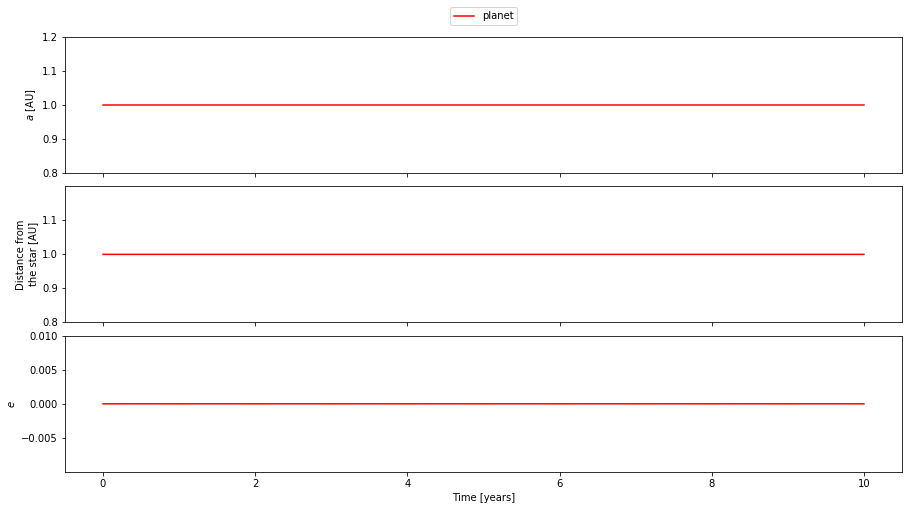

In [5]:
movie = run_simulation(mysim,end_time=10) # run mysim for 10 years
movie # show the movie

<font color=green>There are some things you should notice that may be helpful in the next steps.</font>

First, while the simulation was running, you should have seen a progress bar with some numbers off to the side. The progress bar is to help you see the status of your simulation.  For very short simulations, the simulation may run too fast for the progress bar to show up. The meaning of the numbers are shown in the picture below.  In particular, the "% Done" and "Time Remaining" numbers are quite useful.

<img src="./Files/progress.jpeg" style="width: 600px;">

Second, you have a movie to play with that shows a "top down" view of our planetary system.  The controls of the movie are shown in the picture below.

<img src="./Files/movie.jpeg" style="width: 500px;">

Sometimes the movies may appear to run backward or stay stationary.  This is called the ["wagon wheel effect"](https://en.wikipedia.org/wiki/Wagon-wheel_effect).  If the planet appears to stay still, the frames in the movie are being output once every time the planet goes around the star an integer number of times.  If the planet appears to move backward, the frames are being output when the planet goes around more than once but less than twice (or an integer multiple of that) between frames.

<font color=green>**Before we go any further**</font>, know that we can put all of the code into one cell to make things simpler. An example is shown below. <font color=red> You do _not_ need to run this code.</font>

big planet is not a known planet. Picking a random starting position for the simulation.
small planet is not a known planet. Picking a random starting position for the simulation.


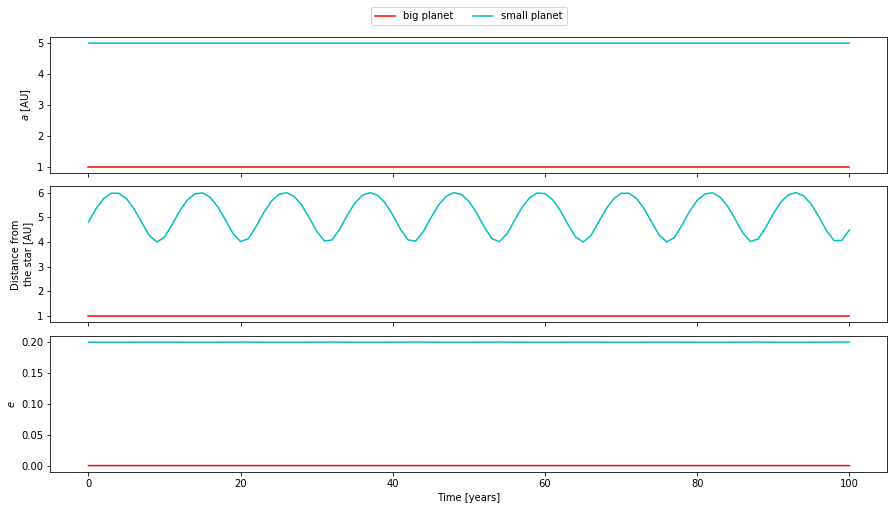

In [7]:
# Create simulation
mysim = initialize_simulation()

# Add a star
add_star(mysim, name='Sun', mass=1.0)

# Add some planets
add_planet(mysim, name='big planet', mass=1, a=1) # a Jupiter at 1 AU
add_planet(mysim, name='small planet', mass=1/300, a=5, e=0.2, i=10) # an eccentric Earth at 5 AU

# Run the simulation and show the movie
movie = run_simulation(mysim,end_time=100)
movie

____
## <font color=blue>Simulate the Solar System</font>

Let's now simulate the Solar System in it's current configuration.

<font color=red>**First, un-comment all lines in the cell below (remove the first '#' sign from all lines), and add the Sun and the giant planets to the simulation below and run it for 100 years.** Use the table below for orbital elements. Neptune's orbit takes 164 years. Does it even make one full orbit around the Sun? How do you expect the orbital elements will change on long timescales, considering that the Solar System has existed for 4.5 billion years?</font>

|    Planet    |     Mass    |   a   |   e   |   i   |
|--------------|-------------|-------|-------|-------|
|    Mercury   |   0.00017   | 0.38  | 0.22  |  7.1  |
|     Venus    |   0.0026    | 0.74  | 0.02  |  3.4  |
|     Earth    |   0.0031    | 1.00  | 0.01  |  0.0  |
|     Mars     |   0.00031   | 1.51  | 0.09  |  1.9  |
|    Jupiter   |     1.0     |  5.2  | 0.05  |  1.3  |
|    Saturn    |    0.30     |  9.5  | 0.05  |  2.5  |
|    Uranus    |    0.046    | 19.2  | 0.05  |  0.8  |
|    Neptune   |    0.054    | 30.1  | 0.01  |  1.8  |





In [9]:
## Initialize the simulation
#mysim = initialize_simulation()
#
## Add the Sun here
#add_star(mysim, name='Sun', mass=1.0)
#
## The inner terrestrial planets 
#add_planet(mysim, name='Mercury', mass=0.00017, a=0.38, e=0.22, i=7.1)
#add_planet(mysim, name='Venus',   mass=0.0026,  a=0.74, e=0.02, i=3.4)
#add_planet(mysim, name='Earth',   mass=0.0031,  a=1.00, e=0.01, i=0.0)
#add_planet(mysim, name='Mars',    mass=0.00034, a=1.51, e=0.09, i=1.9)
#
## Add the giant planets here
#
#
#
#
#
## Run the simulation
#movie = run_simulation(mysim, end_time=0)
#movie

Did you want to run a simulation? Specify an end time that isn't 0!



You might have noticed that this simulation took a long time to run compared to the simulations we ran earlier. There are three big things that impact the time you have to twiddle your thumbs when running simulations like these:
1. The finishing time of the simulation (obviously).
2. The number of bodies in the simulation. At each step, the simulation calculates gravitational interactions between each planet and the Sun as well as between each pair of planets. So, for a two planet system, there are four calculations required (the star on each planet and each planet on each other). For an eight planet system, like the Solar System, there are 256.  Fewer planets means a faster simulation.
3. The distance of the closest planet to the star.  Accurately approximating close-in planets requries more calculations than planets that are farther from their stars. For example, including Mercury in our simulation requires more than 40 times more calculations than if Jupiter is the closest planet to the Sun in the simulation. Thus, the simulation with Jupiter as the closest planet will be a faster simulation.

___
## <font color=blue>What happens if we change the Solar System?</font>

One of the really powerful things we can do with simulations is find out what happens if our Solar System was different. Is the system stable, or do planets collide or even get ejected from the system? This isn't the kind of experiment we can run in "real life", but we can do it with programming!

<font color=red>**Run a few simulations to find out what happens if we change something about our Solar System.**</font> What if there were another giant planet beyond Neptune? What if Jupiter were closer to the Sun? What if the Earth were more massive? What if some planets had more eccentric orbits? <font color=red>Run each simulation to an end time of 10 million years.  This can be written in your code as `end_time=10E6` (capital E is important; in code talk, this translates to $10\times10^6$).</font>


Below are several blank code cells for you to use. Feel free to copy & paste code from your earlier simulation into one of these cells.  At the top of the cell, type a comment to remind yourself what changes you're testing. Remember that comments start with `#`. 

Do you really like a movie you made? Maybe you have something you want to use in your final project? You can save it by putting the following command at the end of the cell that made the movie (you can change `'mymovie'` to any name you like). When you return to the main Binder window with the file list, you can select it to download to your computer.

In [ ]:
movie.save('mymovie.mpeg')